#### Keep samples where the person only performs walking or running for the entire duration of the recording

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
# You may change the mhealth_activity module but your algorithm must support the original version
from mhealth_activity import Recording, Trace, Activity, WatchLocation, Path
from tqdm import tqdm
import pickle

In [2]:
create_data_pickle = True
if create_data_pickle:
    files = os.listdir('data/train')
    files.sort()
    print(files)
    list_of_dicts = []
    types_to_include = ['ax', 'ay', 'az','timestamp']

    for file in tqdm(files):
        Dict = {}
        d = Recording(os.path.join('data/train',file))

        Dict['labels'] = d.labels
        for data_type in types_to_include:
            if data_type in d.data.keys():
                Dict[data_type] = d.data[data_type]
        list_of_dicts.append(Dict)

    data = pd.DataFrame(list_of_dicts)
    data.to_pickle(path='data/stepcount_data.pkl.zst', compression={'method': 'zstd'})
else:
    data = pd.read_pickle('data/stepcount_data.pkl.zst')
    data = data.drop(columns=['mx', 'my', 'mz', 'speed', 'altitude',
       'phone_steps', 'temperature'])

['train_trace_000.pkl', 'train_trace_001.pkl', 'train_trace_002.pkl', 'train_trace_003.pkl', 'train_trace_004.pkl', 'train_trace_005.pkl', 'train_trace_006.pkl', 'train_trace_007.pkl', 'train_trace_008.pkl', 'train_trace_009.pkl', 'train_trace_010.pkl', 'train_trace_011.pkl', 'train_trace_012.pkl', 'train_trace_013.pkl', 'train_trace_014.pkl', 'train_trace_015.pkl', 'train_trace_016.pkl', 'train_trace_017.pkl', 'train_trace_018.pkl', 'train_trace_019.pkl', 'train_trace_020.pkl', 'train_trace_021.pkl', 'train_trace_022.pkl', 'train_trace_023.pkl', 'train_trace_024.pkl', 'train_trace_025.pkl', 'train_trace_026.pkl', 'train_trace_027.pkl', 'train_trace_028.pkl', 'train_trace_029.pkl', 'train_trace_030.pkl', 'train_trace_031.pkl', 'train_trace_032.pkl', 'train_trace_033.pkl', 'train_trace_034.pkl', 'train_trace_035.pkl', 'train_trace_036.pkl', 'train_trace_037.pkl', 'train_trace_038.pkl', 'train_trace_039.pkl', 'train_trace_040.pkl', 'train_trace_041.pkl', 'train_trace_042.pkl', 'train_tra

  0%|          | 0/396 [00:00<?, ?it/s]

100%|██████████| 396/396 [01:50<00:00,  3.58it/s]


In [31]:
# Check where the list length in labels["activities"] is 1
walking = []
running = []
walking_activities = []
running_activities = []
for i in range(len(data)):
    #if len(data.iloc[i]["labels"]["activities"])==1:
    if 1 in data.iloc[i]["labels"]["activities"] and  data.iloc[i]["labels"]["step_count"] is not None:
        walking.append(data.iloc[i])
        walking_activities.append(data.iloc[i]["labels"]["watch_loc"])
    elif 2 in data.iloc[i]["labels"]["activities"] == [2] and data.iloc[i]["labels"]["step_count"] is not None:
        running.append(data.iloc[i])
        running_activities.append(data.iloc[i]["labels"]["watch_loc"])
walking = pd.DataFrame(walking)
running = pd.DataFrame(running)
walking

,labels,ax,ay,az,timestamp
14,"{'path_idx': 2, 'activities': [0, 1, 3], 'step...","Trace(title='ax', total_time=549.90, samplerat...","Trace(title='ay', total_time=549.90, samplerat...","Trace(title='az', total_time=549.90, samplerat...","Trace(title='timestamp', total_time=549.90, sa..."
15,"{'path_idx': 2, 'activities': [0, 1, 3], 'step...","Trace(title='ax', total_time=446.26, samplerat...","Trace(title='ay', total_time=446.26, samplerat...","Trace(title='az', total_time=446.26, samplerat...","Trace(title='timestamp', total_time=446.26, sa..."
17,"{'path_idx': 4, 'activities': [0, 1, 3], 'step...","Trace(title='ax', total_time=416.88, samplerat...","Trace(title='ay', total_time=416.88, samplerat...","Trace(title='az', total_time=416.88, samplerat...","Trace(title='timestamp', total_time=416.88, sa..."
18,"{'path_idx': 4, 'activities': [1, 3], 'step_co...","Trace(title='ax', total_time=354.33, samplerat...","Trace(title='ay', total_time=354.33, samplerat...","Trace(title='az', total_time=354.33, samplerat...","Trace(title='timestamp', total_time=354.33, sa..."
19,"{'path_idx': 3, 'activities': [0, 1, 3], 'step...","Trace(title='ax', total_time=400.59, samplerat...","Trace(title='ay', total_time=400.59, samplerat...","Trace(title='az', total_time=400.59, samplerat...","Trace(title='timestamp', total_time=400.59, sa..."
30,"{'path_idx': 1, 'activities': [1, 2], 'step_co...","Trace(title='ax', total_time=506.39, samplerat...","Trace(title='ay', total_time=506.39, samplerat...","Trace(title='az', total_time=506.39, samplerat...","Trace(title='timestamp', total_time=506.39, sa..."
74,"{'path_idx': 1, 'activities': [1, 3], 'step_co...","Trace(title='ax', total_time=386.01, samplerat...","Trace(title='ay', total_time=386.01, samplerat...","Trace(title='az', total_time=386.01, samplerat...","Trace(title='timestamp', total_time=386.01, sa..."
147,"{'path_idx': 3, 'activities': [0, 1, 3], 'step...","Trace(title='ax', total_time=472.77, samplerat...","Trace(title='ay', total_time=472.77, samplerat...","Trace(title='az', total_time=472.77, samplerat...","Trace(title='timestamp', total_time=472.77, sa..."
165,"{'path_idx': 4, 'activities': [1], 'step_count...","Trace(title='ax', total_time=530.44, samplerat...","Trace(title='ay', total_time=530.44, samplerat...","Trace(title='az', total_time=530.44, samplerat...","Trace(title='timestamp', total_time=530.44, sa..."
178,"{'path_idx': 4, 'activities': [1, 3], 'step_co...","Trace(title='ax', total_time=193.55, samplerat...","Trace(title='ay', total_time=193.55, samplerat...","Trace(title='az', total_time=193.55, samplerat...","Trace(title='timestamp', total_time=193.55, sa..."


In [32]:
print(f"{len(data)} recordings")
print(len(walking))
print(len(running))

396 recordings
28
0


In [88]:
indices_walking = np.array(walking.index)
indices_running = np.array(running.index)
indices_walking

walking_labels = []
for i in walking["labels"]:
    walking_labels.append((i["step_count"]))
walking_labels

[288,
 286,
 179,
 255,
 266,
 960,
 154,
 287,
 1023,
 251,
 172,
 290,
 147,
 281,
 1021,
 168,
 168,
 1018,
 268,
 245,
 286,
 277,
 286,
 273,
 298,
 832,
 293,
 155]

#### Butterworth Filter - Here only done for walking but can also be done for running

In [34]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [181]:
### Unpacking all the relevant signals
ax_walking = [x.values for x in walking["ax"]]
ay_walking = [x.values for x in walking["ay"]]
az_walking = [x.values for x in walking["az"]]
timestamps_walking = [x.values for x in walking["timestamp"]]

# ax_running = [x.values for x in running["ax"]]
# ay_running = [x.values for x in running["ay"]]
# az_running = [x.values for x in running["az"]]
# timestamps_running = [x.values for x in running["timestamp"]]

In [37]:
samplerates_dataframe_x = []
for sample in walking["ax"]:
    samplerates_dataframe_x.append(sample.samplerate)

samplerates_dataframe_y = []
for sample in walking["ay"]:
    samplerates_dataframe_y.append(sample.samplerate)

samplerates_dataframe_z = []
for sample in walking["az"]:
    samplerates_dataframe_z.append(sample.samplerate)

In [ ]:
ax_filtered = []
for i in range(len(ax_walking)):
    signal = ax_walking[i]
    samplerate = samplerates_dataframe_x[i]
    signal = butter_lowpass_filter(signal, cutoff = samplerate/3, fs = samplerate, order = 2)
    print(samplerate)
    ax_filtered.append(signal)

ay_filtered = []
for i in range(len(ay_walking)):
    signal = ay_walking[i]
    samplerate = samplerates_dataframe_y[i]
    signal = butter_lowpass_filter(signal, cutoff = samplerate/3, fs = samplerate, order = 2)
    ay_filtered.append(signal)

az_filtered = []
for i in range(len(az_walking)):
    signal = az_walking[i]
    samplerate = samplerates_dataframe_z[i]
    signal = butter_lowpass_filter(signal, cutoff = samplerate/3, fs = samplerate, order = 2)
    az_filtered.append(signal)

#### Magnitude

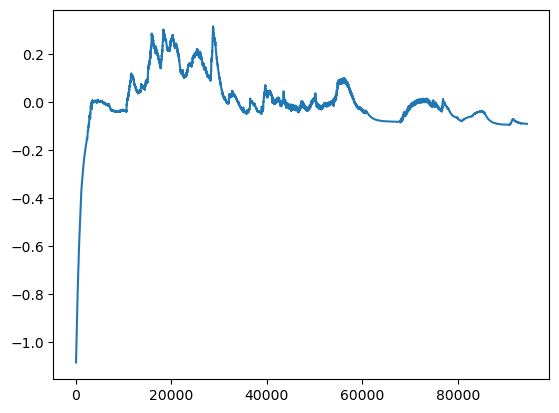

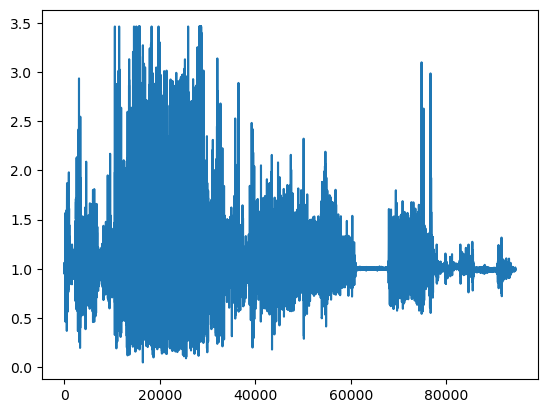

In [188]:
from scipy.signal import cheby2, sosfilt
def filter(low=3):
    magnitude = []
    nyq = 200/2  
    sos = butter(1, low/nyq, btype='lowpass', fs=200, output='sos')

    for i in range(len(ax_walking)):
        norm = np.sqrt(ax_walking[i]**2+ay_walking[i]**2+az_walking[i]**2)
        norm = sosfilt(sos, norm)
        norm = norm - norm.mean()
        magnitude.append(norm)
    return magnitude    
mag = filter()
plt.plot(mag[7])
plt.show()
plt.plot(np.sqrt(ax_walking[7]**2+ay_walking[7]**2+az_walking[7]**2))
plt.show()


#### Find peaks

The threshold parameter is dependent on the smartwatch location, this has to be fine-tuned

In [ ]:
walking_activities

In [185]:
from scipy.signal import find_peaks

#iterate over all recordings and calculate the number of peaks
def calc_peaks(magnitude, wl=25):
    #split into 25 second chunks
    winlen = (wl*200)
    peaks = []
    for mag in magnitude:
        stepCount = 0
        windows = [mag[x : x + winlen] for x in range(0, len(mag), winlen)]
        for window in windows:
            if window.std() > 0.1:
                max_height = window.max()
            else:
                max_height = mag.max()
                
            acc_peaks, _ = find_peaks(window, prominence = max_height/4)
            stepCount += len(acc_peaks)

        peaks.append(stepCount)
    
    #save recording indices, number of peaks and watch location
    peaks_and_indices = pd.concat([pd.DataFrame(indices_walking),pd.DataFrame(peaks),pd.DataFrame(walking_labels), pd.DataFrame(walking_activities),],axis=1)
    peaks_and_indices = peaks_and_indices.set_axis(["Indices","calculated Peaks","label steps", "Smartwatch Location"],axis=1)
    peaks_and_indices = peaks_and_indices.set_index("Indices")
    peaks_and_indices.index.name = None
    return peaks_and_indices

In [186]:
peaks_and_indices = calc_peaks()
print(data.loc[201]["labels"]["step_count"])
peaks_and_indices


290


,calculated Peaks,label steps,Smartwatch Location
14,1,288,2
15,1,286,2
17,203,179,0
18,176,255,1
19,109,266,1
30,42,960,0
74,114,154,1
147,22,287,0
165,997,1023,1
178,256,251,0


### Now gotta try to visualize this somehow

In [187]:
### Find all the samples where the step count is given
res = calc_peaks()
mean_squared_error(res["label steps"].to_numpy(), res["calculated Peaks"].to_numpy())

78026.92857142857

In [153]:
### Use Mean Squared Error to determine the error
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

def opt_fun(params):
    low, winlen = params
    mag = filter(low)
    res = calc_peaks(mag, winlen)
    return mean_squared_error(res["label steps"].to_numpy(), res["calculated Peaks"].to_numpy())

bounds=((None,None), (1,None))
opt = minimize(fun=opt_fun, method = 'Powell', x0=(3,25), bounds=bounds)
optimal_parameters = opt.x
print(opt)

# print(opt_fun((70,3)))

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 219887.32142857142
       x: [ 1.000e-01  2.514e+04]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00]]
    nfev: 27
